In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [2]:
df_1 =pd.read_excel("C:/Users/HP/Downloads/monthly_sales.xlsx")

In [3]:
df_2 =pd.read_excel("C:/Users/HP/Downloads/monthly_sales_2023.xlsx")

In [4]:
df_3=pd.read_excel("C:/Users/HP/Downloads/monthly_sales_2024.xlsx")

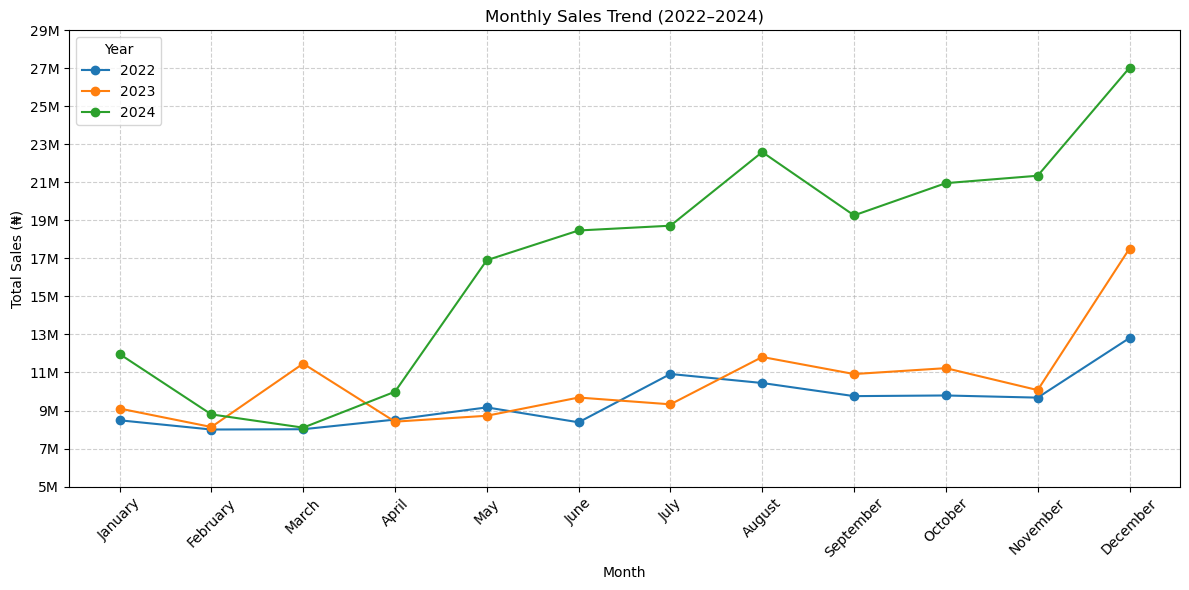

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure months are ordered properly
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Add a Year column to each dataset
df_1["Year"] = 2022
df_2["Year"] = 2023
df_3["Year"] = 2024

# Combine all datasets
df_all = pd.concat([df_1, df_2, df_3], ignore_index=True)

# Ensure months follow correct order
df_all["Month"] = pd.Categorical(df_all["Month"], categories=month_order, ordered=True)

# Pivot for plotting
df_pivot = df_all.pivot(index="Month", columns="Year", values="Total Sales (₦)")

# Plot
plt.figure(figsize=(12, 6))
for year in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[year], marker="o", label=str(year))

plt.title("Monthly Sales Trend (2022–2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales (₦)")

# Custom y-axis ticks (start at 5 million, step 2 million)
y_min = 5_000_000
y_max = df_pivot.max().max() + 2_000_000  # a bit higher than the largest value
yticks = np.arange(y_min, y_max, 2_000_000)
plt.yticks(yticks, [f"{int(y/1_000_000)}M" for y in yticks])

plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
import pandas as pd
import math

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_1["Year"] = 2022
df_2["Year"] = 2023
df_3["Year"] = 2024

data = pd.concat([df_1, df_2, df_3], ignore_index=True)

# Encode month (1–12)
month_map = {m: i+1 for i, m in enumerate(
    ["January","February","March","April","May","June",
     "July","August","September","October","November","December"]
)}
data["Month_Num"] = data["Month"].map(month_map)

# Features & target
X = data[["Year", "Month_Num"]]
y = data["Total Sales (₦)"]

# ===== Models =====
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "SVR (linear)": SVR(kernel="linear"),
    "SVR (rbf)": SVR(kernel="rbf"),
    "SVR (poly)": SVR(kernel="poly", degree=3),
}

results = []

def aic_bic_from_mse(mse, n, k):
    # Gaussian log-likelihood with MSE as sigma^2 estimate
    loglik = -0.5 * n * (math.log(2 * math.pi * mse) + 1)
    aic = 2 * k - 2 * loglik
    bic = math.log(n) * k - 2 * loglik
    return aic, bic

for name, model in models.items():
    # Fit and predict (on the same data here)
    model.fit(X, y)
    y_pred = model.predict(X)

    # Metrics
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2  = r2_score(y, y_pred)

    n = len(y)
    k = X.shape[1]  # number of predictors used
    aic, bic = aic_bic_from_mse(mse, n, k)

    # Params / interpretability
    intercept = None
    coefficients = None
    extra_info = None

    if name == "Linear Regression":
        intercept = model.intercept_
        coefficients = model.coef_.tolist()

    elif isinstance(model, SVR) and model.kernel == "linear":
        # SVR linear exposes coef_ and intercept_ differently
        intercept = float(model.intercept_[0])
        coefficients = model.coef_[0].tolist()

    elif name == "Random Forest":
        extra_info = model.feature_importances_.tolist()

    elif isinstance(model, SVR):  # rbf / poly
        extra_info = f"Support Vectors: {model.support_.shape[0]}"

    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R2": r2,
        "AIC": aic,
        "BIC": bic,
        "Intercept": intercept,
        "Coefficients": coefficients,
        "Extra Info": extra_info
    })

results_df = pd.DataFrame(results)[
    ["Model", "MSE", "MAE", "R2", "AIC", "BIC", "Intercept", "Coefficients", "Extra Info"]
]
print(results_df)


               Model           MSE           MAE        R2          AIC  \
0  Linear Regression  8.409399e+12  2.414002e+06  0.658973  1177.536933   
1      Random Forest  5.880912e+11  5.611851e+05  0.976151  1081.768897   
2       SVR (linear)  3.002597e+13  3.455970e+06 -0.217645  1223.354590   
3          SVR (rbf)  3.002686e+13  3.456088e+06 -0.217681  1223.355658   
4         SVR (poly)  3.002686e+13  3.456088e+06 -0.217681  1223.355658   

           BIC     Intercept                            Coefficients  \
0  1180.703971 -7.594377e+09  [3757687.722083334, 757406.4740909092]   
1  1084.935935           NaN                                    None   
2  1226.521628  1.000695e+07                            [12.0, 64.0]   
3  1226.522696           NaN                                    None   
4  1226.522696           NaN                                    None   

                                  Extra Info  
0                                       None  
1  [0.4760566677471101

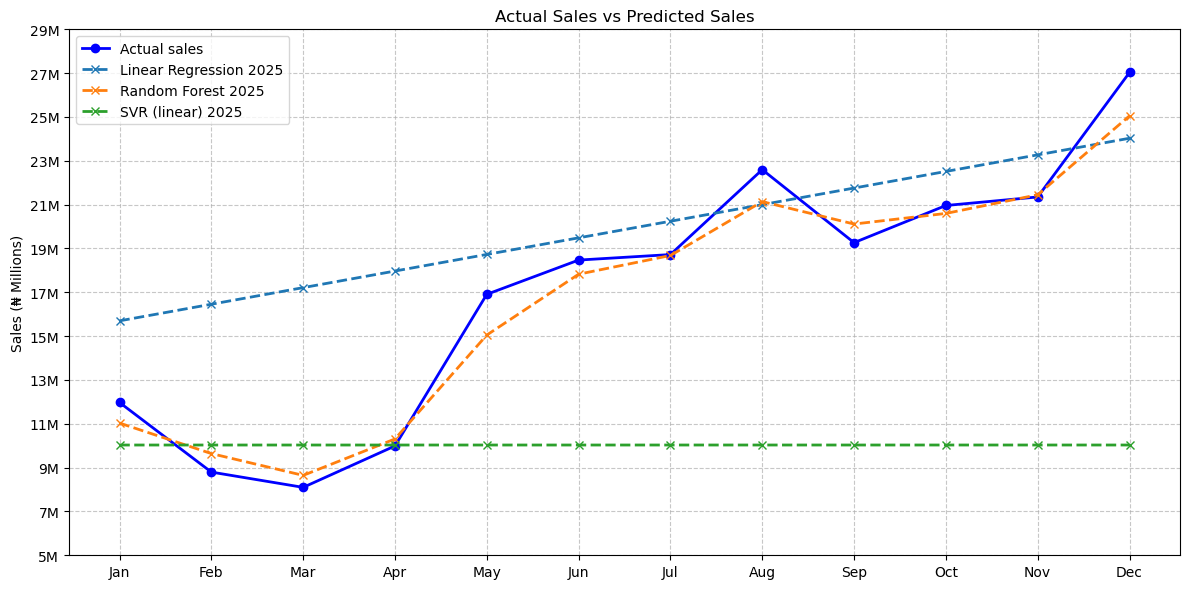

In [26]:
import matplotlib.ticker as mtick


months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(12,6))


actual_2024 = data[data["Year"]==2024].sort_values("Month_Num")["Total Sales (₦)"].values
plt.plot(range(1,13), actual_2024, marker="o", color="blue", linewidth=2, label="Actual sales")


for name in ["Linear Regression", "Random Forest", "SVR (linear)"]:
    plt.plot(range(1,13), predictions_2025[name], marker="x", linestyle="--", linewidth=2, label=f"{name} 2025")

plt.xticks(range(1,13), months)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.yticks(np.arange(5e6, max(actual_2024.max(), max(predictions_2025["Linear Regression"]))+2e6, 2e6))

plt.ylabel("Sales (₦ Millions)")
plt.title("Actual Sales vs Predicted Sales")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


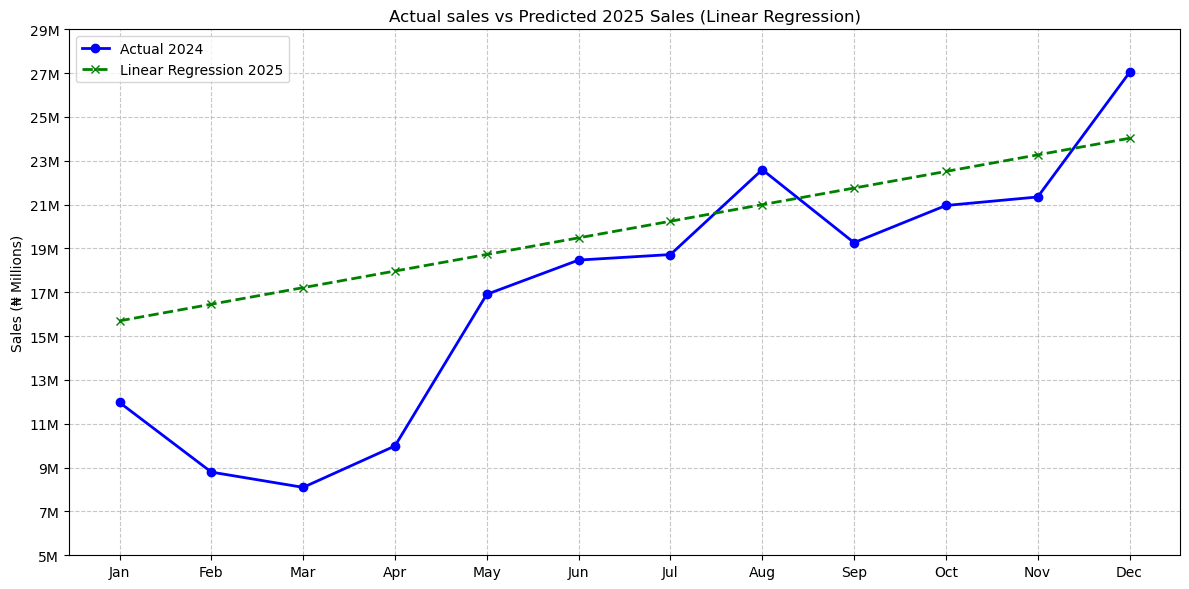

In [20]:
import matplotlib.ticker as mtick


months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(12,6))

# Actual 2024 sales
actual_2024 = data[data["Year"]==2024].sort_values("Month_Num")["Total Sales (₦)"].values
plt.plot(range(1,13), actual_2024, marker="o", color="blue", linewidth=2, label="Actual 2024")

plt.plot(range(1,13), predictions_2025["Linear Regression"], marker="x", linestyle="--", color="green", linewidth=2, label="Linear Regression 2025")

plt.xticks(range(1,13), months)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.yticks(np.arange(5e6, max(actual_2024.max(), predictions_2025["Linear Regression"].max())+2e6, 2e6))

plt.ylabel("Sales (₦ Millions)")
plt.title("Actual sales vs Predicted 2025 Sales (Linear Regression)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


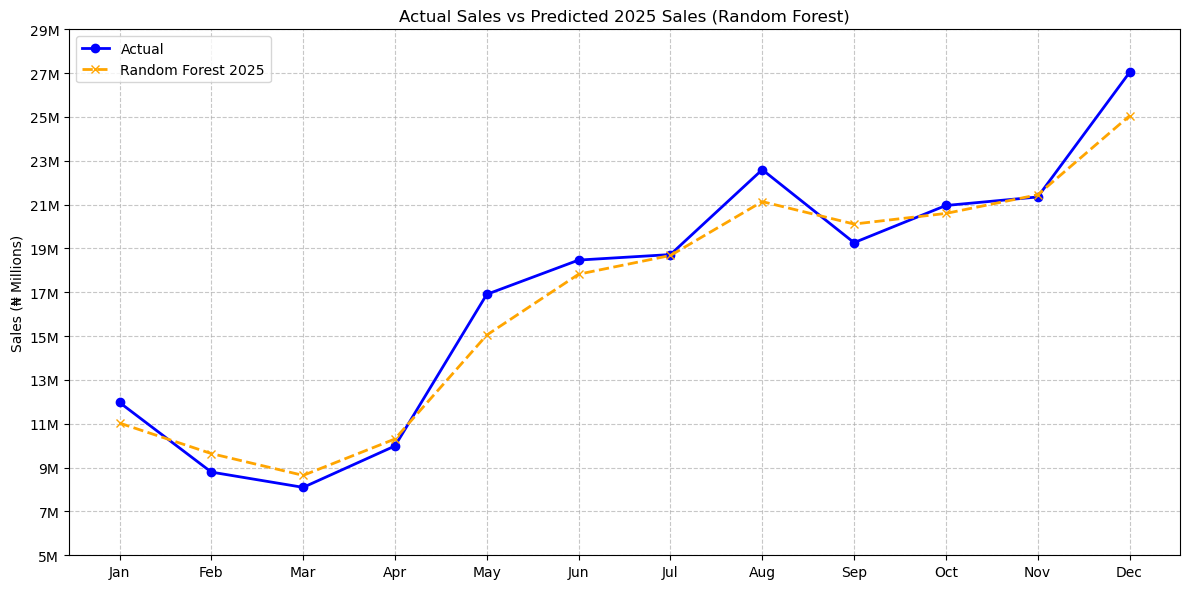

In [29]:
import matplotlib.ticker as mtick


months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(12,6))

# Actual 2024 sales
actual_2024 = data[data["Year"]==2024].sort_values("Month_Num")["Total Sales (₦)"].values
plt.plot(range(1,13), actual_2024, marker="o", color="blue", linewidth=2, label="Actual")

# Predictions for Random Forest only
plt.plot(range(1,13), predictions_2025["Random Forest"], marker="x", linestyle="--", color="orange", linewidth=2, label="Random Forest 2025")

plt.xticks(range(1,13), months)


plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.yticks(np.arange(5e6, max(actual_2024.max(), predictions_2025["Random Forest"].max())+2e6, 2e6))

plt.ylabel("Sales (₦ Millions)")
plt.title("Actual Sales vs Predicted 2025 Sales (Random Forest)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


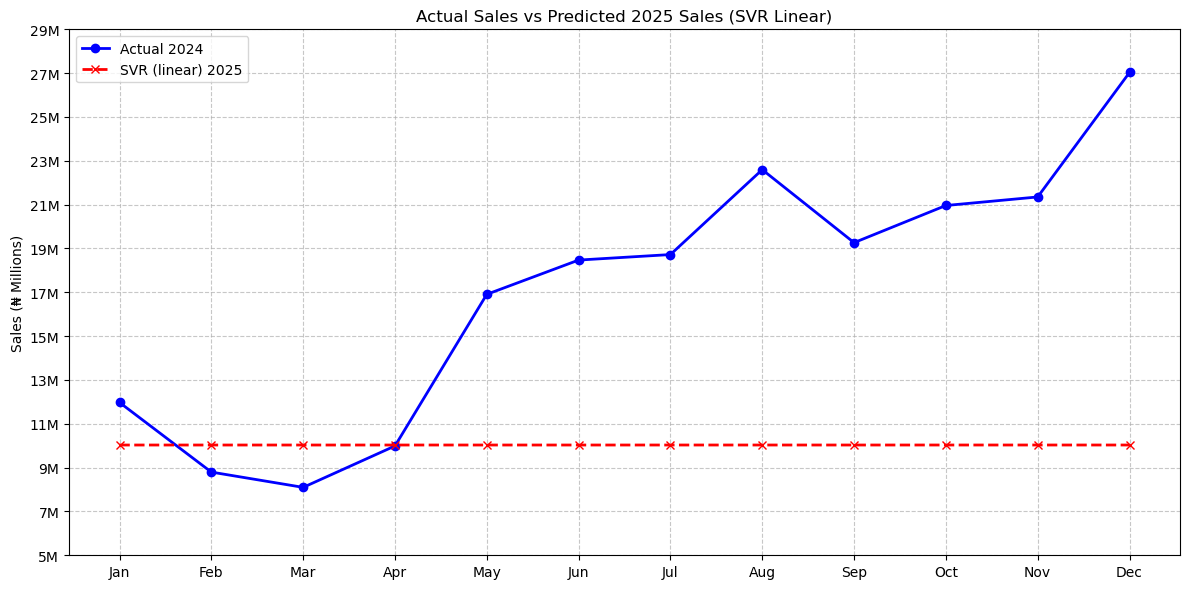

In [25]:
import matplotlib.ticker as mtick


months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(12,6))


actual_2024 = data[data["Year"]==2024].sort_values("Month_Num")["Total Sales (₦)"].values
plt.plot(range(1,13), actual_2024, marker="o", color="blue", linewidth=2, label="Actual 2024")

# Predictions for SVR (linear) only
plt.plot(range(1,13), predictions_2025["SVR (linear)"], marker="x", linestyle="--", color="red", linewidth=2, label="SVR (linear) 2025")

plt.xticks(range(1,13), months)


plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.yticks(np.arange(5e6, max(actual_2024.max(), predictions_2025["SVR (linear)"].max())+2e6, 2e6))

plt.ylabel("Sales (₦ Millions)")
plt.title("Actual Sales vs Predicted 2025 Sales (SVR Linear)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error


df_1['Year'] = 2022
df_2['Year'] = 2023
df_3['Year'] = 2024


df_all = pd.concat([df_1, df_2, df_3])
df_all.reset_index(drop=True, inplace=True)


df_all['Date'] = pd.to_datetime(df_all['Year'].astype(str) + '-' + df_all['Month'])
df_all.set_index('Date', inplace=True)

# Ensure numeric sales
df_all['Total Sales (₦)'] = pd.to_numeric(df_all['Total Sales (₦)'], errors='coerce')

sales = df_all['Total Sales (₦)']

ses_model = SimpleExpSmoothing(sales).fit(optimized=True)
ses_pred = ses_model.fittedvalues  # fitted values (in-sample prediction)

ses_forecast = ses_model.forecast(12)

mse = mean_squared_error(sales, ses_pred)
mae = mean_absolute_error(sales, ses_pred)
rmse = np.sqrt(mse)

print(f"Optimized Alpha (smoothing parameter): {ses_model.model.params['smoothing_level']:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Optimized Alpha (smoothing parameter): 0.7417
MSE: 7290783724671.27
MAE: 1897294.63
RMSE: 2700145.13


C:\Users\HP\AppData\Local\Temp\ipykernel_26132\1407302059.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['Date'] = pd.to_datetime(df_all['Year'].astype(str) + '-' + df_all['Month'])
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [32]:
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# =========================
# Step 1: Combine your datasets
# =========================
# Example: your three datasets
# df_1 = 2022 data, df_2 = 2023 data, df_3 = 2024 data

# Ensure each has columns: "Month", "Total Sales (₦)"
df_1['Year'] = 2022
df_2['Year'] = 2023
df_3['Year'] = 2024

# Combine into one dataframe
all_data = pd.concat([df_1, df_2, df_3], ignore_index=True)

# Create a time index
all_data['Date'] = pd.to_datetime(all_data['Year'].astype(str) + '-' + all_data['Month'])
all_data = all_data.sort_values('Date')

# Set Date as index
all_data.set_index('Date', inplace=True)
sales = all_data['Total Sales (₦)']

# =========================
# Step 2: Fit Holt’s Linear Trend (Double Exponential Smoothing)
# =========================
holt_model = Holt(sales).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=True)

# Get fitted values
holt_fitted = holt_model.fittedvalues

# =========================
# Step 3: Performance Metrics
# =========================
mse = mean_squared_error(sales, holt_fitted)
mae = mean_absolute_error(sales, holt_fitted)
rmse = np.sqrt(mse)

print("Holt's Linear Trend (Double Exp Smoothing) Results")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Alpha (level smoothing): {holt_model.params['smoothing_level']:.4f}")
print(f"Beta (trend smoothing): {holt_model.params['smoothing_trend']:.4f}")


Holt's Linear Trend (Double Exp Smoothing) Results
MSE: 7820195297849.38
MAE: 1974592.53
RMSE: 2796461.21
Alpha (level smoothing): 0.8000
Beta (trend smoothing): 0.2000


C:\Users\HP\AppData\Local\Temp\ipykernel_26132\2652484397.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Date'] = pd.to_datetime(all_data['Year'].astype(str) + '-' + all_data['Month'])
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


C:\Users\HP\AppData\Local\Temp\ipykernel_26132\1014463453.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Date'] = pd.to_datetime(all_data['Year'].astype(str) + '-' + all_data['Month'])
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


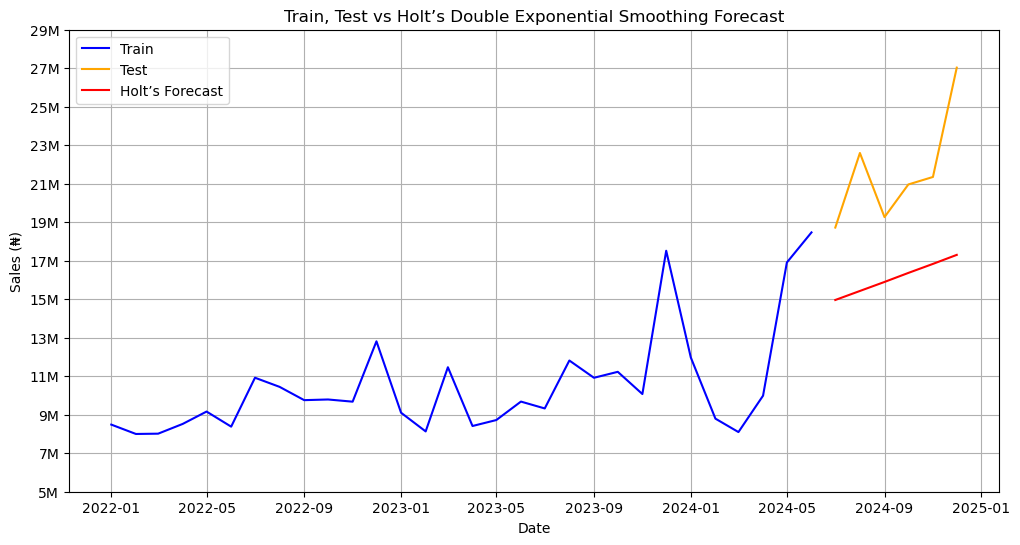

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

# =========================
# Prepare dataset
# =========================
df_1['Year'] = 2022
df_2['Year'] = 2023
df_3['Year'] = 2024

all_data = pd.concat([df_1, df_2, df_3], ignore_index=True)
all_data['Date'] = pd.to_datetime(all_data['Year'].astype(str) + '-' + all_data['Month'])
all_data.set_index('Date', inplace=True)
sales = all_data['Total Sales (₦)']

# =========================
# Train-Test Split (e.g. last 6 months as test)
# =========================
train = sales[:-6]
test = sales[-6:]

# =========================
# Holt’s Model (Double Exponential Smoothing)
# =========================
holt_model = Holt(train).fit(optimized=True)
holt_forecast = holt_model.forecast(len(test))

# =========================
# Plot
# =========================
plt.figure(figsize=(12,6))

plt.plot(train.index, train, label="Train", color="blue")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, holt_forecast, label="Holt’s Forecast", color="red")

# Custom Y-axis: start at 5M, step by 2M
plt.yticks(np.arange(5_000_000, sales.max()+3_000_000, 2_000_000), 
           [f"{y/1_000_000:.0f}M" for y in np.arange(5_000_000, sales.max()+3_000_000, 2_000_000)])

plt.title("Train, Test vs Holt’s Double Exponential Smoothing Forecast")
plt.ylabel("Sales (₦)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()